## **EJEMPLO RENDIMIENTO DE COMBUSTIBLE EN AUTOS**

In [1]:
# Cargando librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense,Flatten


In [2]:
dataset_path=tf.keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

col_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

raw_dataset=pd.read_csv(dataset_path,names=col_names,na_values="?",comment="\t",sep=" ",skipinitialspace=True)

dataset=raw_dataset.copy()

print(dataset.head())

print(dataset.shape)

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
(398, 8)


### **Datos Faltantes**

In [3]:
# Manejo de datos faltantes
print(dataset.isna().sum())

# En este caso se eliminan pero no siempre es la solucion
dataset=dataset.dropna()
print("\nTamaño final del dataframe: ",dataset.shape)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Tamaño final del dataframe:  (392, 8)


### **Variables categoricas**

In [4]:
Origin=dataset.pop('Origin')

dataset['USA']=(Origin==1)*1.0
dataset['Europe']=(Origin==2)*1.0
dataset['Japan']=(Origin==3)*1.0

dataset.tail()

# Usando Skilearn tambien se puede realizar asi:

# Pendiente

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### **Partición del conjunto de datos**

Si bien este proceso se puede realizar usando las herramientas de Pandas, es posible simplificarlo mediante recursos de la libreria Sklearn. Veamos inicialmente como se realiza con Pandas unicamente.

In [7]:
# Particion usando Pandas

train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

train_lb=train_dataset.pop('MPG')
test_lb=test_dataset.pop('MPG')

train_stats=train_dataset.describe()
train_stats=train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### **Normalizacion de datos**

En este paso se conrola de diversidad de rangos de variación natural en la cual vengan los datos, para lo cual se puede:

    - Estandarizar
    - Normalizar

Usando la libreria *sklearn* se tiene:

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#print(train_dataset.type)

#Inicializacion
scaler = MinMaxScaler()
stand=StandardScaler()

#Estandarización los datos
train_datasetN = stand.fit_transform(train_dataset)
test_datasetN = stand.fit_transform(test_dataset)
#print(pd.DataFrame(train_datasetN).describe())

#Escalado de los datos
train_datasetS = scaler.fit_transform(train_dataset)
test_datasetS = scaler.fit_transform(test_dataset)
#print(pd.DataFrame(train_datasetS).describe())

### **Definición del Modelo**

In [20]:
def make_model():
    modelo=Sequential()
    modelo.add(Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]))
    modelo.add(Dense(64,activation='relu'))
    modelo.add(Dense(1))
    return modelo

Modelo01=make_model()
Modelo01.summary()

c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Configuración del Modelo**

In [47]:
optimizer=tf.keras.optimizers.RMSprop(0.001)

Modelo01.compile(loss='mae',optimizer=optimizer,metrics=['mae','mse'])

### **Entrenamiento**

In [48]:
epocas=200

Hst=Modelo01.fit(train_datasetN,train_lb,epochs=epocas,validation_split=0.2,verbose=1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 18.8207 - mae: 18.8207 - mse: 530.5765 - val_loss: 10.4600 - val_mae: 10.4600 - val_mse: 157.7872
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.1759 - mae: 7.1759 - mse: 87.0030 - val_loss: 4.1328 - val_mae: 4.1328 - val_mse: 26.6632
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8955 - mae: 2.8955 - mse: 13.0644 - val_loss: 3.2940 - val_mae: 3.2940 - val_mse: 16.8521
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8968 - mae: 1.8968 - mse: 6.3606 - val_loss: 3.0823 - val_mae: 3.0823 - val_mse: 15.0679
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7866 - mae: 1.7866 - mse: 5.7629 - val_loss: 3.0232 - val_mae: 3.0232 - val_mse: 14.2911
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5644 - mae: 1.5644 - mse: 4.4130 - val_loss: 3.0039 - val_mae: 3.0039 - val_mse: 14.2733
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5095 - mae: 1.5095 - mse: 4.7109 - va

### **Evaluacion del Modelo**

In [31]:
hist=pd.DataFrame(Hst.history)
hist['epoch']=Hst.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,6.858943,1.836455,6.858943,7.508665,2.077959,7.508665,195
196,6.742462,1.825861,6.742462,7.775790,2.165252,7.775790,196
197,6.674091,1.830563,6.674091,7.512596,2.124059,7.512596,197
198,6.687494,1.796586,6.687494,7.418128,2.048588,7.418128,198
199,6.663042,1.787905,6.663042,7.337671,2.092550,7.337671,199


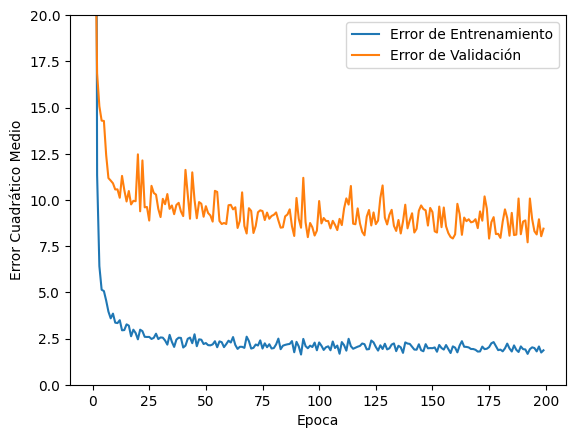

In [50]:
# Funcion para graficar el resultado de entrenamiento y validacion

def plot_history(Hst):
    hist=pd.DataFrame(Hst.history)
    hist['epoch']=Hst.epoch
    plt.figure()
    plt.xlabel('Epoca')
    plt.ylabel('Error Cuadrático Medio')
    plt.plot(hist['epoch'],hist['mse'],label='Error de Entrenamiento')
    plt.plot(hist['epoch'],hist['val_mse'],label='Error de Validación')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(Hst)


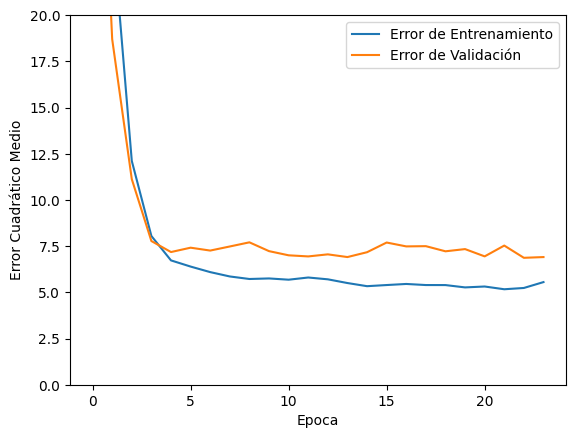

In [51]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

Hst=Modelo01.fit(train_datasetS,train_lb,epochs=epocas,validation_split=0.2,verbose=0,callbacks=[early_stop])

plot_history(Hst)